## Data Analysis of TCS Stock Price (Last 5 Years)

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [63]:
colors = ['#FF0000', '#00FF00', '#0000FF', '#FFC0CB', '#FFA500', '#FFFF00', '#800080', '#00FFFF', '#FF69B4', '#008000']

In [64]:
data = pd.read_csv("TCS.NS.csv")

In [65]:
data # From 21 May 2018 to 19 May 2023 

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-05-21,1764.349976,1796.000000,1759.025024,1778.375000,1595.874634,3446178
1,2018-05-22,1779.000000,1787.474976,1746.849976,1754.449951,1574.404541,1857416
2,2018-05-23,1762.500000,1772.500000,1740.500000,1747.550049,1568.212769,1507298
3,2018-05-24,1755.000000,1807.500000,1751.175049,1801.849976,1616.940552,2962316
4,2018-05-25,1812.500000,1837.400024,1786.275024,1792.900024,1608.908691,3769772
...,...,...,...,...,...,...,...
1230,2023-05-15,3284.000000,3292.000000,3248.350098,3255.050049,3255.050049,1150390
1231,2023-05-16,3256.199951,3285.000000,3250.449951,3258.149902,3258.149902,986306
1232,2023-05-17,3255.949951,3280.000000,3198.250000,3208.699951,3208.699951,1588815
1233,2023-05-18,3225.949951,3228.949951,3195.000000,3199.850098,3199.850098,1369364


## Basic Data Formatting

In [66]:
fresh_data = {
    "Date" : [],
    "Candle" : [],
    "Upper Wick" : [],
    "Body" : [],
    "Lower Wick" : [],
    "Close" : [],
    "Candle Length" : [],
    "Volume" : [],
    "Daily Return" : []
    
 }
first_time = True

for i in data.index:
    o = data["Open"][i]
    h = data["High"][i]
    l = data["Low"][i]
    c = data['Close'][i]
    
    if o > c: # Red candle
        fresh_data["Candle"].append("RED")
        fresh_data['Upper Wick'].append(h - o)
        fresh_data['Lower Wick'].append(c - l)
        fresh_data["Body"].append(o - c)
    else:
        fresh_data["Candle"].append("GREEN")
        fresh_data['Upper Wick'].append(h - c)
        fresh_data['Lower Wick'].append(o - l)
        fresh_data["Body"].append(c - o)
    
    fresh_data['Date'].append((data['Date'][i]))
    fresh_data['Volume'].append(data['Volume'][i])
    fresh_data["Close"].append(data["Adj Close"][i])
    fresh_data['Candle Length'].append(h - l)
    
    if first_time:
        change = 0
        previous_close = c
        first_time = False
    else:
        change = round(((c/previous_close) - 1) * 100, 2)
        previous_close = c
    
    fresh_data["Daily Return"].append(change)

In [67]:
fresh_data = pd.DataFrame(fresh_data)

In [68]:
fresh_data

,Date,Candle,Upper Wick,Body,Lower Wick,Close,Candle Length,Volume,Daily Return
0,2018-05-21,GREEN,17.625000,14.025024,5.324952,1595.874634,36.974976,3446178,0.00
1,2018-05-22,RED,8.474976,24.550049,7.599975,1574.404541,40.625000,1857416,-1.35
2,2018-05-23,RED,10.000000,14.949951,7.050049,1568.212769,32.000000,1507298,-0.39
3,2018-05-24,GREEN,5.650024,46.849976,3.824951,1616.940552,56.324951,2962316,3.11
4,2018-05-25,RED,24.900024,19.599976,6.625000,1608.908691,51.125000,3769772,-0.50
...,...,...,...,...,...,...,...,...,...
1230,2023-05-15,RED,8.000000,28.949951,6.699951,3255.050049,43.649902,1150390,-0.59
1231,2023-05-16,GREEN,26.850098,1.949951,5.750000,3258.149902,34.550049,986306,0.10
1232,2023-05-17,RED,24.050049,47.250000,10.449951,3208.699951,81.750000,1588815,-1.52
1233,2023-05-18,RED,3.000000,26.099853,4.850098,3199.850098,33.949951,1369364,-0.28


To enhance the meaningfulness of the data, I implemented formatting changes. Firstly, I removed the variables "Open," "High," "Low," and "Close" and replaced them with more informative features. These new features include the data of the day candles, the length of the upper wick, the length of the body, the length of the lower wick, and the length of the overall candle. Additionally, I replaced the "Adjusted Close" with the "Close" value for consistency.

Moreover, I introduced a new column that indicates the color of the candle formed on each specific date. This column distinguishes between a green candle and a red candle, providing further insights into the market trends and price movements.

These formatting adjustments aim to provide more meaningful data for future analysis and facilitate a better understanding of the market dynamics.

### Explanation of Columns in fresh_data:

> #### Date: The date on which the trading occurred.  
> #### Candle: Indicates the color of the candle formed on the daily chart. It represents whether the price increased or decreased during the trading day.
> #### Upper Wick: Refers to the length of the upper wick of the candle. The upper wick represents the highest price reached during the trading day.
> #### Body: Represents the length of the body of the candle. The body signifies the price range between the opening and closing prices of the trading day.
> #### Lower Wick: Denotes the length of the lower wick of the candle. The lower wick represents the lowest price reached during the trading day.
> #### Close: Indicates the adjusted closing price of the trading day, which is the final price at which the trading session concluded.
> #### Candle Length: Represents the total length of the candle, including both the upper and lower wicks and the body.
> #### Volume: Represents the volume of shares traded on that specific date, indicating the level of market activity.
> #### Daily Return: Indicates the percentage change in the closing price of the current day compared to the closing price of the previous day, representing the daily rate of return.

In [69]:
fresh_data.isnull().sum() # We have no missing values

Date             0
Candle           0
Upper Wick       0
Body             0
Lower Wick       0
Close            0
Candle Length    0
Volume           0
Daily Return     0
dtype: int64

## Correlational Analysis between various fetaures

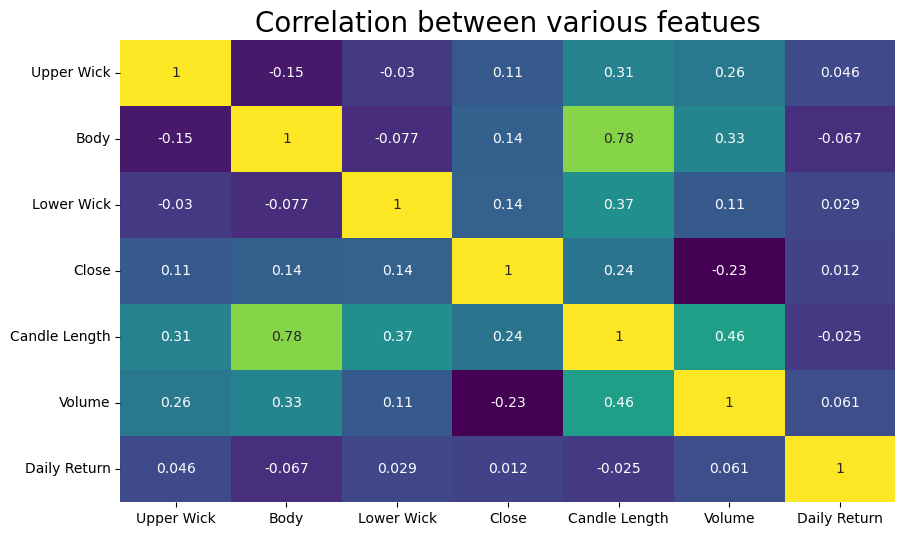

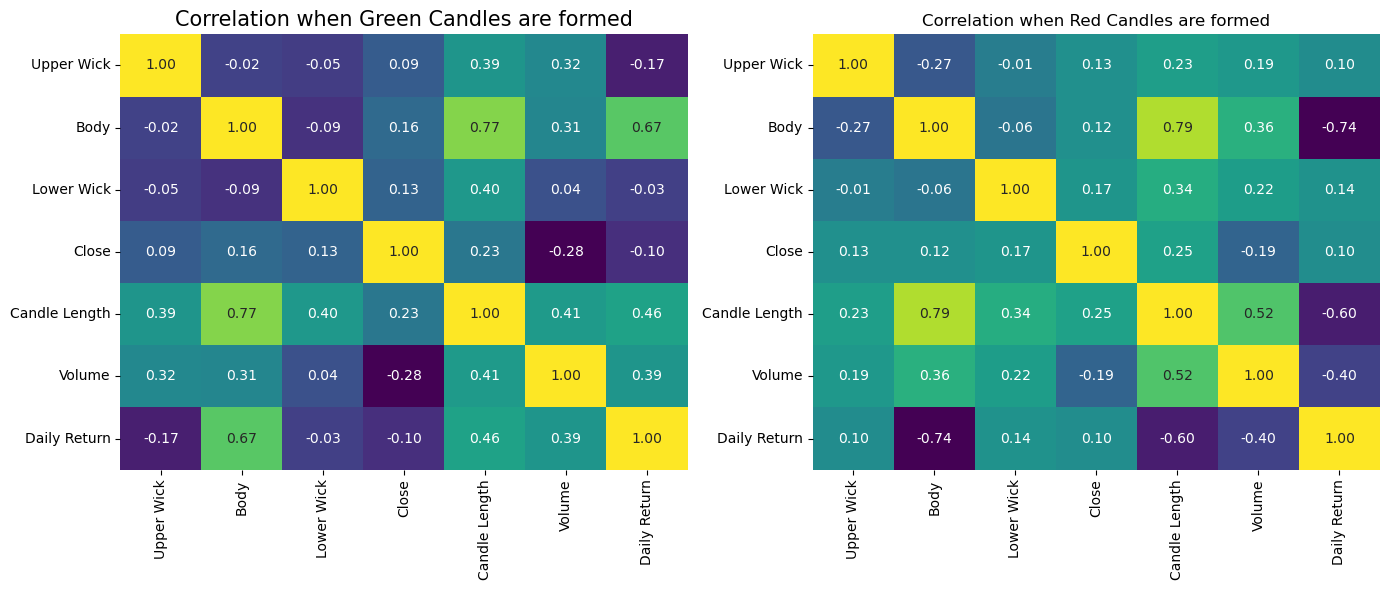

In [70]:
plt.figure(figsize=(10, 6))
plt.title("Correlation between various featues", fontdict={"fontsize" : 20})
sns.heatmap(fresh_data.corr(), annot = True, cmap = "viridis", cbar=False)
plt.show()
plt.figure(figsize=(14, 6))
    plt.subplot(1, 2 ,1,)
    sns.heatmap(green_data.corr(), annot = True, cmap = "viridis", cbar=False, fmt="1.2f")
    plt.title("Correlation when Green Candles are formed", fontdict={"fontsize" : 15})
plt.subplot(1, 2 ,2)
sns.heatmap(red_data.corr(), annot = True, cmap = "viridis", cbar=False, fmt="1.2f")
plt.title("Correlation when Red Candles are formed", fontdict={"fontsize" : 12})
plt.tight_layout()
plt.show()

### Observations:
> ### Volume and Candle Length: There is a strong positive correlation between volume and candle length. A higher trading volume is associated with longer candles, indicating increased volatility in the market. This suggests that larger price movements are more likely to occur when trading volume is higher.

> ### Close and Volume: There is a negative correlation between the closing price and volume. As the trading volume increases, the closing price tends to decrease. This negative correlation suggests that higher trading activity is often accompanied by lower closing prices. It implies that increased volume may exert downward pressure on prices.

> ### Volume and Candle Length based on Candle Color: The correlation between volume and candle length is more positive when  red candles are formed, indicating an downward price movement. On the other hand, the positive correlation is less pronounced when green candles are formed, suggesting an upward price movement. This implies that higher volume is more strongly associated with larger candle lengths when prices are falling compared to when prices are rising.

> ### Length of Upper Wick and Length of Body: There is always a negative correlation between the length of the upper wick and the length of the body of the candle. However, when green candles are formed, this negative correlation is less pronounced, whereas it becomes stronger for red candles. This indicates that the relationship between the length of the upper wick and the length of the body depends on the candle color.

> ### Length of Body and Daily Return: Overall, there is an insignificant negative correlation between the length of the body and the daily return. However, when green candles are formed, there is a significant positive correlation between the two, suggesting that larger green candles are associated with higher daily returns. Conversely, when red candles are formed, there is a significant negative correlation, indicating that larger red candles are associated with lower daily returns. Similar is the case of Daily Return with Volume.

## Basic Statistics

In [71]:
fresh_data["Date"] = pd.to_datetime(fresh_data['Date'])

In [72]:
fresh_data.index = fresh_data['Date']

In [73]:
fresh_data.describe()

,Upper Wick,Body,Lower Wick,Close,Candle Length,Volume,Daily Return
count,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1.235000e+03,1235.000000
mean,13.541577,27.802286,14.736734,2594.528698,56.080596,2.933749e+06,0.061077
std,12.524270,24.005869,12.414650,694.586911,27.190347,1.787561e+06,1.605572
min,0.000000,0.000000,0.000000,1550.249634,8.250000,1.445300e+05,-9.410000
25%,5.050049,9.750000,6.612549,1924.805054,37.025024,1.834612e+06,-0.740000
50%,10.149902,21.649902,11.699951,2607.799805,50.000000,2.498833e+06,0.060000
75%,18.949951,39.449951,20.000000,3218.211181,68.699951,3.449566e+06,0.880000
max,126.500000,167.449951,181.849975,3885.789551,313.949951,2.290380e+07,9.850000


## Analysing Closing Price

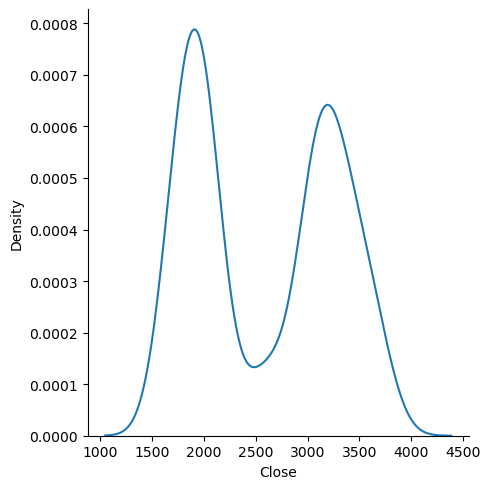

In [74]:
sns.displot(data= fresh_data, x = "Close", kind = "kde")

<AxesSubplot:xlabel='Date', ylabel='Close'>

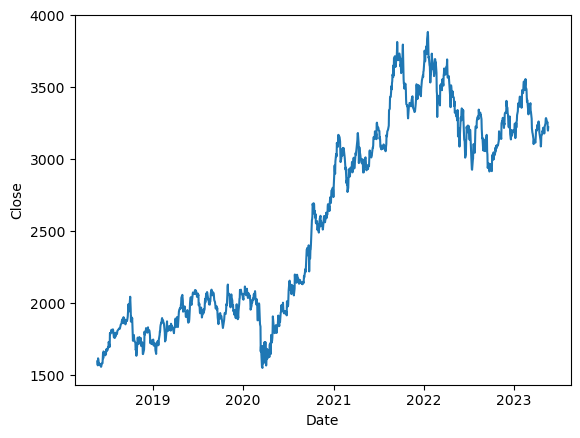

In [75]:
sns.lineplot(data= fresh_data, x = fresh_data.index , y = fresh_data['Close'])

### Observations:
> ### We can observe that the stock remained at relatively stable levels for extended periods around 2000 and 35000. This pattern is also evident in the kernel density estimate (KDE) plot, where we can see two prominent peaks. The first peak corresponds to the period when the stock price was centered around 2000, while the second peak represents the time when the stock price was centered around 35000. The presence of these distinct peaks in the KDE plot reinforces the notion that the stock had prolonged periods of consolidation or stability around these specific price levels.

## Analysing Volume

<AxesSubplot:xlabel='Volume', ylabel='Candle Length'>

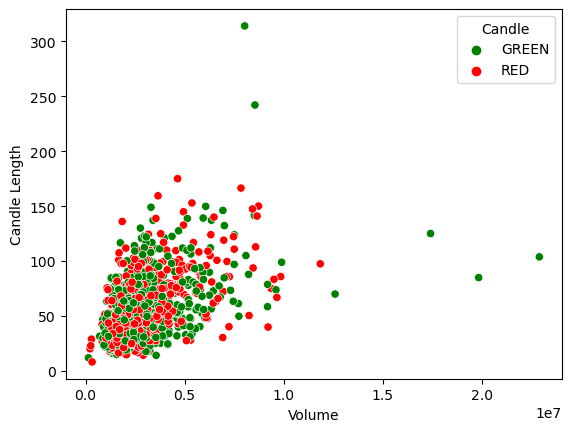

In [76]:
sns.scatterplot(data = fresh_data, x = "Volume", y = "Candle Length", hue="Candle", palette=["Green", "Red"])

### Observations
> ### The scatter plot demonstrates the relationship between volume and the length of the candle. As the trading volume increases, length of the candle also increases. This visual representation provides strong evidence for a positive correlation between volume and candle length. The scatter plot highlights the pattern that higher trading volume tends to coincide with larger candle lengths, indicating a connection between trading activity and increased market volatility.

## Analysing Length of Upper and Lower Wick

<AxesSubplot:xlabel='Lower Wick', ylabel='Upper Wick'>

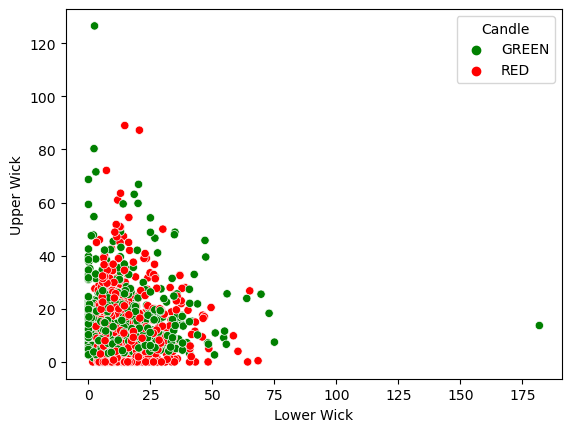

In [77]:
sns.scatterplot(data= fresh_data, x = "Lower Wick", y = "Upper Wick", hue = "Candle", palette=['green', "red"])

(-1.0, 75.0)

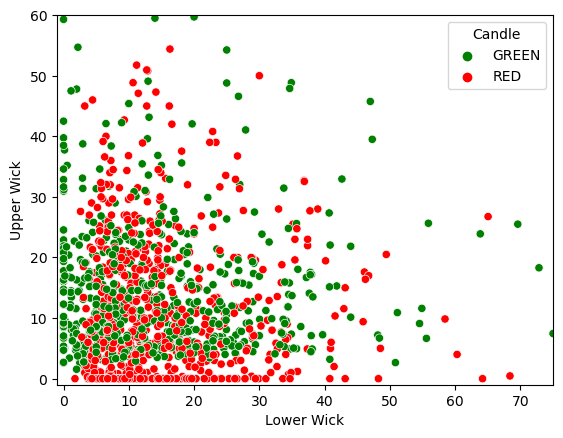

In [78]:
sns.scatterplot(data= fresh_data, x = "Lower Wick", y = "Upper Wick", hue = "Candle", palette=['green', "red"])
plt.ylim((-1, 60))
plt.xlim((-1, 75))

### Observations:
> ### One important observation is that whenever we have red candles, the lower wick lengths are not equal to 0. Similarly, when green candles are formed, the upper wick lengths are not equal to 0. This implies that whenever there is a decrease in price, the closing point will not be at the lowest point of the day, and when the price is increasing, the closing point will not be at the highest point of the day.

> ### In terms of the scatter plot, it exhibits a triangular pattern. For lower values of both upper wick length and lower wick length, there is not a strong correlation between them. However, for higher values of upper wick length or lower wick length, a negative correlation becomes evident between the two. This means that when the upper wick length or lower wick length exceeds 30, there is a tendency for longer upper wicks to be associated with shorter lower wicks, and vice versa.

## Time Series Analysis -  Volume

Text(0.5, 0, 'Monhts')

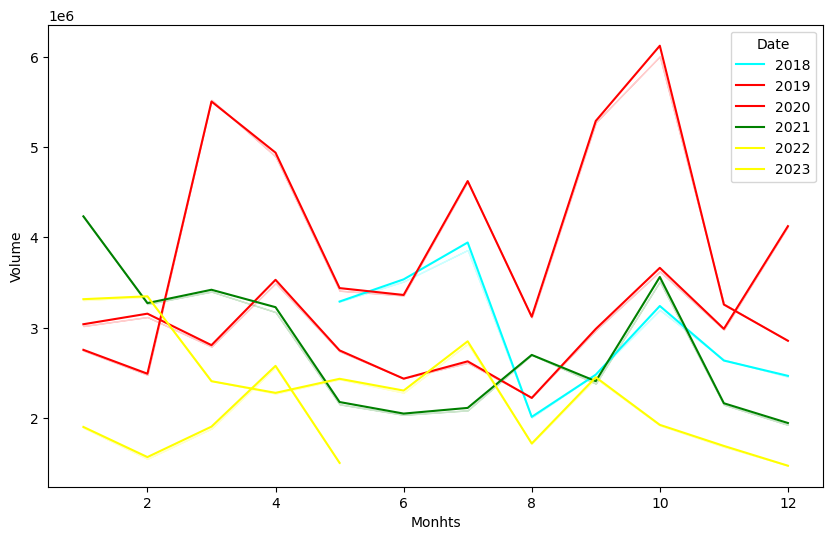

In [94]:
c = np.random.choice(colors, 6)
plt.figure(figsize=(10, 6))
sns.lineplot(data= fresh_data, x = fresh_data.index.month, y = "Volume", ci = 0, hue=fresh_data.index.year, palette=list(c))
plt.xlabel("Monhts")

In [80]:
def quarter(data):
    if data.month <= 3:
        return 1
    elif data.month <=6:
        return 2
    elif data.month <=9:
        return 3
    else:
        return 4
fresh_data["Quarter"] = fresh_data['Date'].apply(quarter)

In [81]:
fresh_data['Year'] = fresh_data.index.year

Text(0, 0.5, 'Volumes')

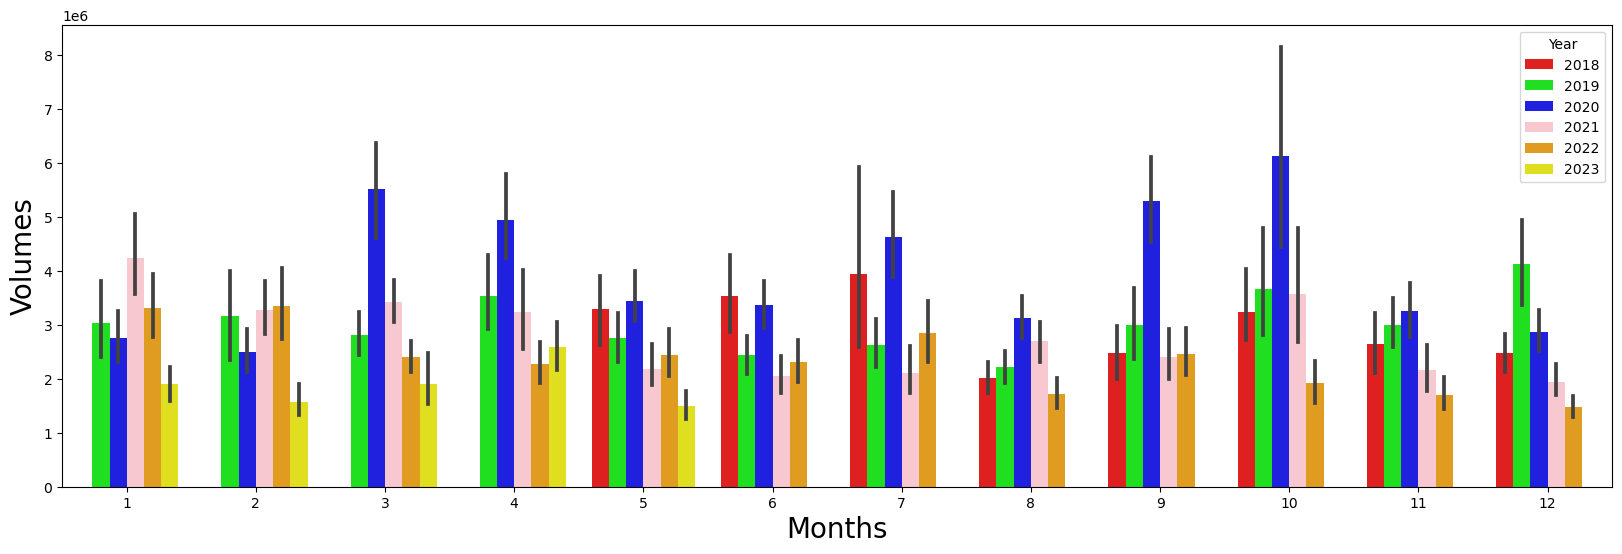

In [82]:
plt.figure(figsize=(20, 6))
sns.barplot(data= fresh_data, x = fresh_data.index.month, y = "Volume", hue = "Year", palette=colors[:6])
plt.xlabel("Months", fontdict={"fontsize":20})
plt.ylabel("Volumes", fontdict={"fontsize":20})

### Observations
> ### It can be seen from the above charts that trading activitity generally tends to be higher in the months of March, April, July, September and October. This is because Volume tends to be higher for these years in all preceedings years from 2018.

 ## Time Series Analysis -  Daily Return

Text(0, 0.5, 'Daily Average Return')

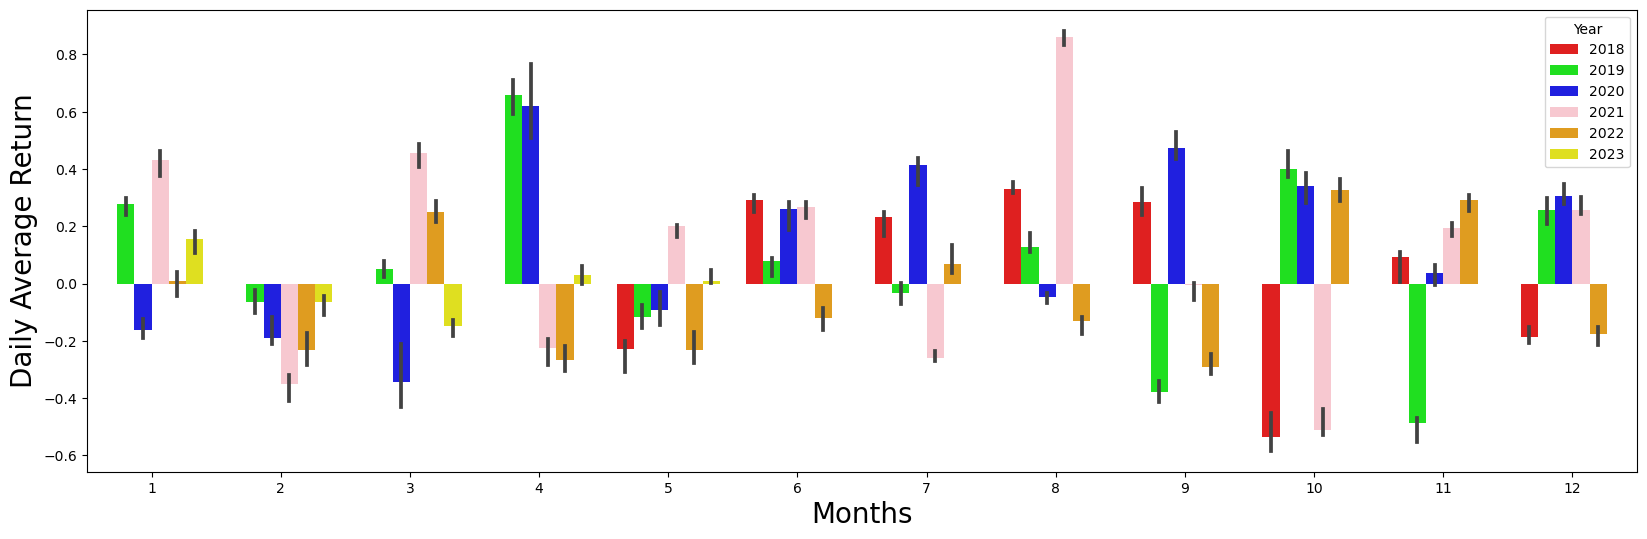

In [83]:
plt.figure(figsize=(20, 6))
sns.barplot(data= fresh_data, x = fresh_data.index.month, y = "Daily Return", hue = "Year", ci = 10, estimator= np.mean, palette=colors[:6])
plt.xlabel("Months", fontdict={"fontsize":20})
plt.ylabel("Daily Average Return", fontdict={"fontsize":20})

### Observations:
> ### Invariably, the month of February has consistently yielded a negative daily average return.
> ### Historically, the month of June has consistently exhibited a daily positive average return, except for the year 2022.
> ### The months of March, April, September, and October tend to display significant fluctuations in returns, with either high negative returns or high positive returns. This volatility in these months could account for the observed patterns.





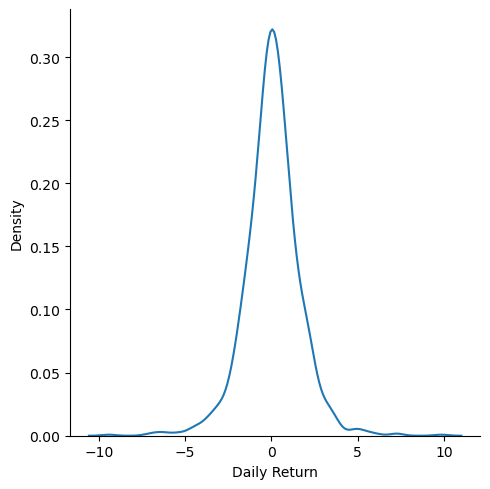

In [84]:
sns.displot(data = fresh_data, x = "Daily Return", kind = "kde")

Text(0.5, 1.0, 'Over The Past 5 years')

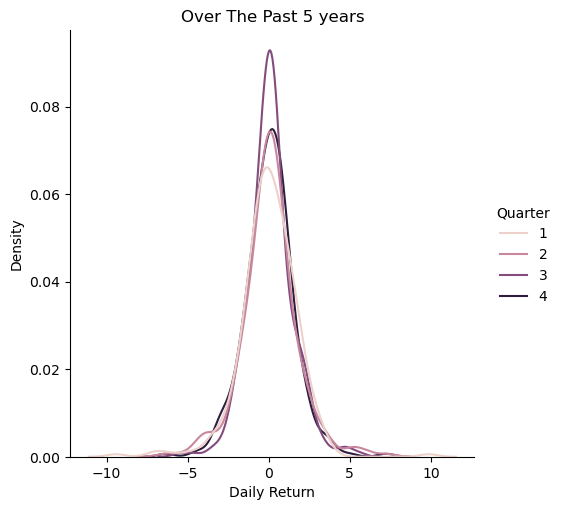

In [93]:
sns.displot(data = fresh_data, x = "Daily Return", kind = "kde", hue = "Quarter")
plt.title("Over The Past 5 years")

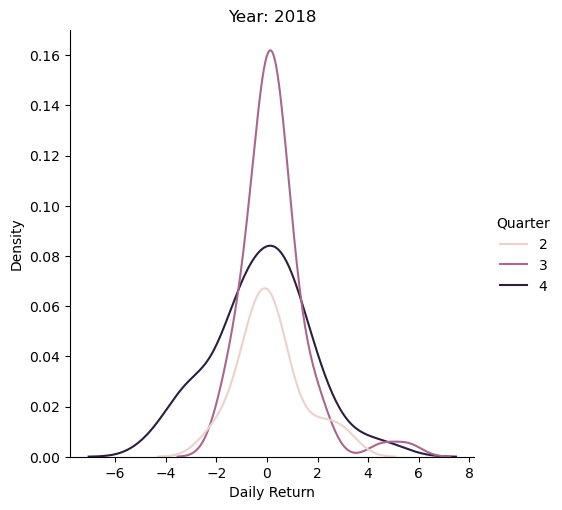

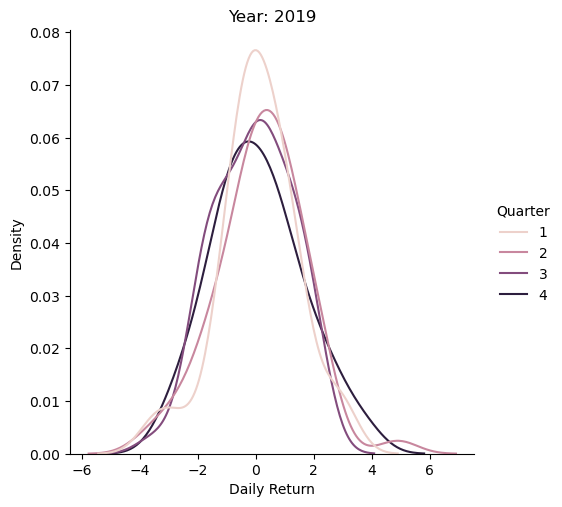

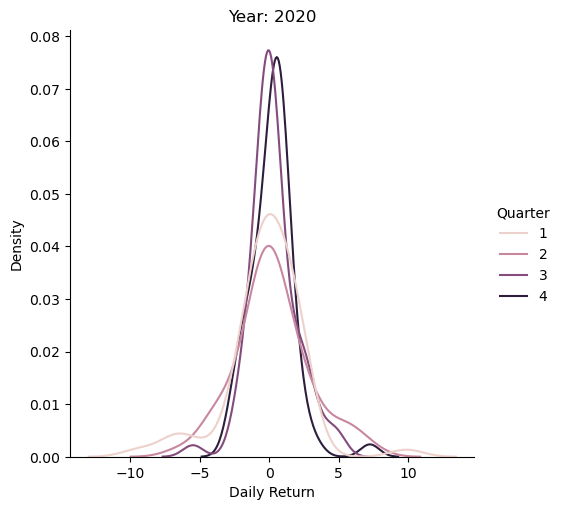

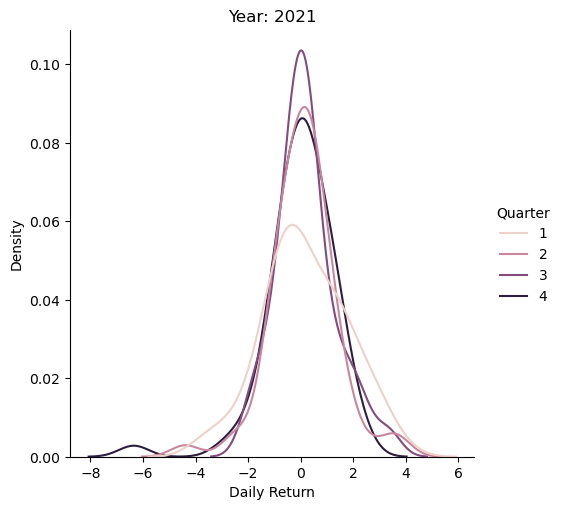

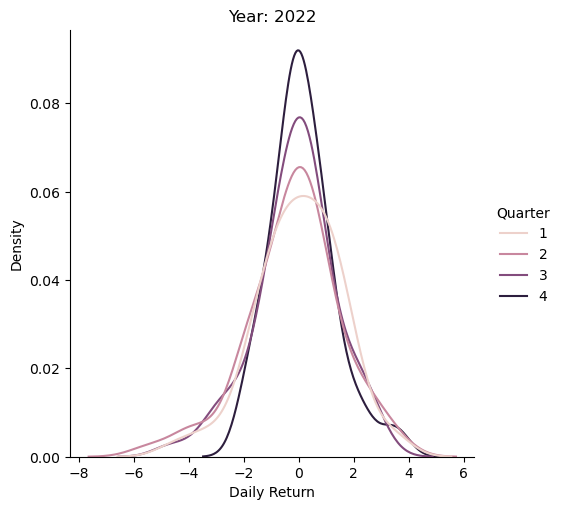

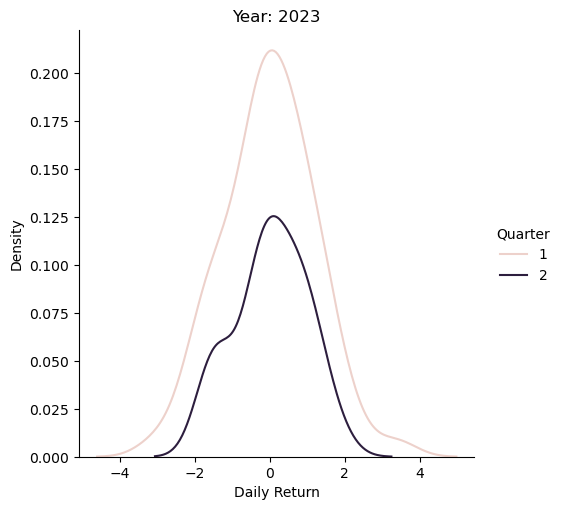

In [90]:
for i in [2018, 2019, 2020, 2021, 2022, 2023]:
    
    sns.displot(data = fresh_data[fresh_data["Year"] == i], x = "Daily Return", kind = "kde", hue = "Quarter")
    plt.title(f"Year: {i}")
    plt.show()

### Observations:
> ### The distribution of daily returns demonstrates a bell-shaped curve with a symmetrical pattern. This indicates that extremely high returns and extremely low returns are exceptional occurrences. The majority of days exhibit a daily return that is close to the average of all daily returns.

<AxesSubplot:xlabel='Daily Return'>

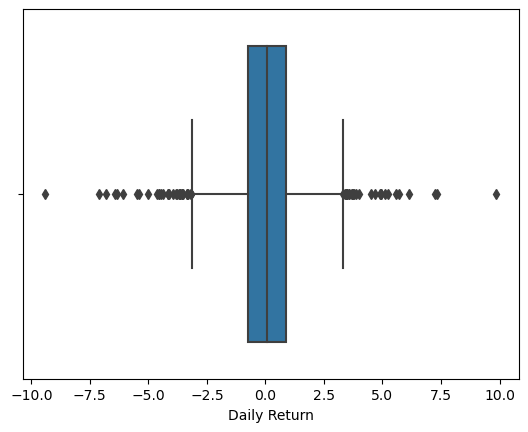

In [101]:
sns.boxplot(data= fresh_data, x = "Daily Return")

### Observations:
> ### The points located at the extremes of the box plot of the Daily Return are considered outliers. These outliers can be considered exceptional returns, as they deviate significantly from the majority of the data points within the distribution.

In [102]:
def get_outlier_range(data):
    q1 = np.quantile(data, 0.25)
    q3 = np.quantile(data, 0.75)
    iqr = q3 - q1
    return (q1 - 1.5*iqr, q3 + 1.5*iqr)

In [106]:
lb, ub = get_outlier_range(fresh_data['Daily Return'])

In [111]:
tcs_exceptional_return = fresh_data[((fresh_data['Daily Return'] > ub) | (fresh_data["Daily Return"] < lb)) ]

In [113]:
tcs_exceptional_return = tcs_exceptional_return["2022-01-01" : "2023-05-22"]

### Below is the data of dates during which the TCS stock exhibited exceptional returns (positive and negative) between January 1, 2022, and May 21, 2023.

In [114]:
tcs_exceptional_return

,Date,Candle,Upper Wick,Body,Lower Wick,Close,Candle Length,Volume,Daily Return,Quarter,Year
Date,,,,,,,,,,,
2022-01-27,2022-01-27,RED,2.399902,81.750000,24.149902,3534.363281,108.299804,5718297,-3.20,1,2022
2022-02-22,2022-02-22,RED,17.899902,63.600098,16.399902,3473.491699,97.899902,5408531,-3.58,1,2022
2022-02-24,2022-02-24,RED,9.850098,72.350098,10.549804,3294.558105,92.750000,5039136,-4.55,1,2022
2022-02-25,2022-02-25,GREEN,9.250000,52.750000,6.000000,3409.908203,68.000000,2549723,3.50,1,2022
2022-04-18,2022-04-18,RED,0.000000,81.949951,5.550049,3416.978760,87.500000,3820792,-3.66,2,2022
2022-05-19,2022-05-19,RED,8.000000,135.050049,31.949951,3159.256104,175.000000,4642963,-5.42,2,2022
2022-05-25,2022-05-25,RED,0.000000,125.200196,13.599853,3088.590576,138.800049,3548046,-3.66,2,2022
2022-05-30,2022-05-30,GREEN,11.350098,78.250000,10.649902,3291.009277,100.250000,2094624,3.49,2,2022
2022-06-13,2022-06-13,RED,3.000000,70.399902,27.150147,3139.244141,100.550049,3030921,-4.18,2,2022


### Finding out the reasons of the exceptional return

In [115]:
from newspaper import Article
from GoogleNews import GoogleNews

In [61]:
news_result = {
    "Date" : [],
    "Exceptional Return" : [],
    "News" : [],
    "Summary" : [],
    "Source" : []
}

for index in tcs_exceptional_return.index:
    i = str(index).split("-")
    start = [i[1], i[2].split(" ")[0], i[0]]
    end = [i[1], str(int(i[2].split(" ")[0]) + 1), i[0]]
    start = "/".join(start)
    end = "/".join(end)
    if tcs_exceptional_return.loc[index, "Daily Return"] > 0:
        query = "Why TCS stock gave high return"
    else:
        query = "Why TCS Stock Fell?"
    

    googlenews=GoogleNews(start=start,end=end, region="IND")
    googlenews.search(query)
    result=googlenews.result()
    df=pd.DataFrame(result)
    article = Article(df["link"][0])
    article.download()
    article.parse()
    article.nlp()

    news_result['Date'].append(tcs_exceptional_return.loc[index, "Date"])
    news_result['Exceptional Return'].append(tcs_exceptional_return.loc[index, "Daily Return"])
    news_result["News"].append(article.title)
    news_result["Summary"].append(article.summary)
    news_result["Source"].append(article.source_url)
    

In [121]:
news_result2 = pd.DataFrame(news_result)

In [141]:
pd.set_option("display.max_colwidth", None)

In [142]:
news_result2

,Date,Exceptional Return,News,Summary,Source
0,2022-01-27,-3.20,"Market Highlights: Sensex falls 581 points, Nifty ends above 17,100-mark","Share/Stock Highlights: The topline equity indices on BSE and National Stock Exchange (NSE) trimmed most of their intraday losses and ended around 1 per cent lower on Thursday weighed by technology stocks amid weakness in the global market that declined as the US Federal Reserve’s signal to steadily tighten policy soured global investor sentiment.\nExplained | Understanding the potential impact of Fed rate hike on US and other economiesThe S&P BSE Sensex fell 581.21 points (1.00 per cent) to end at 57,276.94 while the broader Nifty 50 declined 167.80 points (0.97 per cent) to settle at 17,110.15.\nBoth the indices had opened over 1 per cent lower and slipped nearly 2.5 per cent in the intraday trade with the Sensex hitting a low of 56,439.36 while the Nifty touched 16,866.75.\nOn the Sensex pack, HCL Technologies, Tech Mahindra, Dr. Reddy’s Laboratories, Wipro, Tata Consultancy Services (TCS) and Titan Company were the top losers of the day while Axis Bank, State Bank of India (SBI), Maruti Suzuki India, Kotak Mahindra Bank, Sun Pharmaceutical Industries and IndusInd Bank were the top gainers.\n(with inputs from agencies)",https://indianexpress.com
1,2022-02-22,-3.58,Cadila Healthcare shares fall to 52-week low on DCGI nod to rival's Covid-19 vaccine,"Cadila Healthcare stock fell to its 52-week low today after the Drugs Controller General of India (DCGI) cleared the COVID-19 vaccine of competitor Biological E against the company's own vaccine ZyCoV-D.Cadila Healthcare share hit a fresh low of Rs 355.7, falling 4.17% against the previous close of Rs 371.10 on BSE.\nCadila Healthcare share is trading lower than 5 day, 20 day, 50 day, 100 day and 200 day moving averages.\nEarlier, Cadila Healthcare and Bharat Biotech's Covaxin had received the regulator's emergency approval for use on young adults.\nOn August 20, 2021, Zydus Cadila's three-dose Covid vaccine ZyCoV-D received DCGI approval for emergency use authorization in both adults and children over 12 years.\nHowever, according to reports, Zydus Cadila's ZyCoV-D vaccine - approved last year is yet to be rolled out in the vaccination drive.",https://www.businesstoday.in
2,2022-02-24,-4.55,"Bloody Thursday: Ukraine crisis sparks sell-off; Sensex, Nifty crack 5% each","Bloody Thursday: Ukraine crisis sparks sell-off; Sensex, Nifty crack 5% each23 min read .\nUpdated: 24 Feb 2022, 03:48 PM ISTPremium Stock market LIVE updates: Equities fell and oil prices jumped on Thursday after Russia's ground forces invaded Ukraine from several directions, encircling the country within hours of President Vladimir Putin announcing his decision to launch an assault.\n(File Photo: Reuters)",https://www.livemint.com
3,2022-02-25,3.50,"Nifty ends above 16,600, Sensex rallies 1300 pts; all sectoral indices higher","Nifty ends above 16,600, Sensex rallies 1300 pts; all sectoral indices higher25 min read .\nUpdated: 25 Feb 2022, 03:52 PM ISTPremium Stock market today: A day after being hammered following Russia's invasion of Ukraine, India equity markets surged on Friday, with benchmarks Sensex and Nifty rising more than 2% each.",https://www.livemint.com
4,2022-04-18,-3.66,"Sensex tanks 1172 pts, Nifty ends below 17,200; Infosys, HDFC twins top losers","Sensex tanks 1172 pts, Nifty ends below 17,200; Infosys, HDFC twins top losers19 min read .\nUpdated: 18 Apr 2022, 04:03 PM ISTPremium Market Closing: Indian indices shed around 2% on Monday amid weak global cues.\n(Hemant Mishra/Mint)",https://www.livemint.com
5,2022-05-19,-5.42,"Sensex tumbles 1416 pts, Nifty ends below 15,850; ITC shines, TCS, Wipro bleed","Sensex tumbles 1416 pts, Nifty ends below 15,850; ITC shines, TCS, Wipro bleed24 min read .\nUpdated: 19 May 2022, 03:47 PM ISTPremium Market Closing: Indian indices lost around 2.6% on Thursday amid extremely negative global trends.\nPhoto: Hemant Mishra/Mi

### I attempted to gather news about the days when TCS Stock experienced exceptional returns from Google News. The news was extracted from the first article that appeared on Google News. It's important to note that the information may not be entirely accurate, but it should provide a general understanding of why TCS Stock experienced exceptional returns on those particular days.

## Analysing Correlation of TCS Stock with Competitors as well as Market Index

In [145]:
tcs = pd.read_csv("TCS.NS.csv")
infy = pd.read_csv("INFY.NS.csv")
nifty = pd.read_csv("NSEI.csv")
hcl = pd.read_csv("HCLTECH.NS.csv")
wipro = pd.read_csv("WIPRO.NS.csv")
nifty_it = pd.read_csv("NIFTY_IT.csv")

def format_data(data):
    data = data.copy()
    data["Date"] = pd.to_datetime(data["Date"])
    data.index = data['Date']
    data['Close'] = data["Adj Close"]
    data.drop(['Open', "High", "Low", "Adj Close", "Date"], axis = 1, inplace = True)
    data["Daily Return"] = 0
    first_time = True
    for i in data.index:
        if first_time:
            first_time = False
            previous_close = data.loc[i, "Close"]
        else:
            data.loc[i, "Daily Return"] = round((1 - data.loc[i, "Close"]/previous_close) * 100 , 2)
            previous_close = data.loc[i, "Close"]
    return data

tcs = format_data(tcs)
infy = format_data(infy)
nifty = format_data(nifty)
hcl = format_data(hcl)
wipro = format_data(wipro)
nifty_it = format_data(nifty_it)

close_data = pd.DataFrame({
    "tcs" : tcs["Close"],
    "infy" : infy["Close"],
    "nifty" : nifty["Close"],
    "hcl" : hcl['Close'],
    "wipro" : wipro["Close"],
    "nifty_it" : nifty_it["Close"]
    
})

return_data = pd.DataFrame({
    "tcs" : tcs["Daily Return"],
    "infy" : infy["Daily Return"],
    "nifty" : nifty["Daily Return"],
    "hcl" : hcl["Daily Return"],
    "wipro" : wipro["Daily Return"],
    "nifty_it" : nifty_it["Daily Return"]
    
})

<AxesSubplot:title={'center':'Correlation between Daily Close of Major IT Stocks and Market Index\n'}>

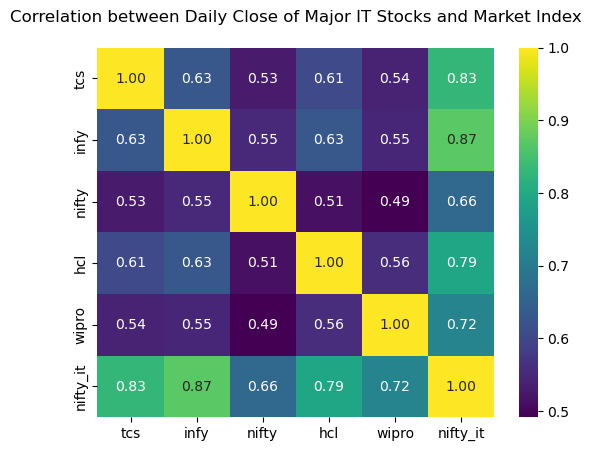

In [150]:
plt.title("Correlation between Daily Close of Major IT Stocks and Market Index\n")
sns.heatmap(return_data.corr(), annot = True, cmap = "viridis", fmt="1.2f")

<AxesSubplot:title={'center':'Correlation between Daily Average Return of Major IT Stocks and Market Index\n'}>

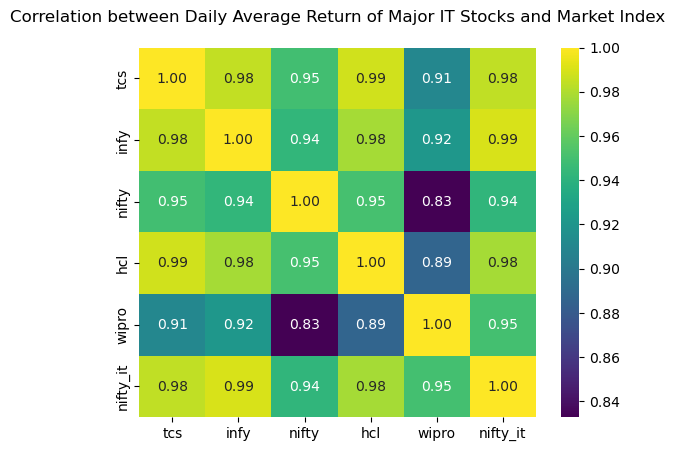

In [156]:
plt.title("Correlation between Daily Average Return of Major IT Stocks and Market Index\n")
sns.heatmap(close_data.corr(), annot = True, cmap = "viridis", fmt="1.2f")

### Observations:
> ### It is evident that there is a high degree of correlation among various tech companies as well as the market index. However, it is interesting to note that Wipro exhibits the lowest correlation with other IT stocks.